<a href="https://colab.research.google.com/github/womaro/Story/blob/main/Seaborn_and_Linear_Regression_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.shape

(5391, 6)

In [ ]:
data.sample(10).sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1894,3756,10/18/2002,Auto Focus,"$7,000,000","$2,703,821","$2,062,066"
1269,731,7/16/1999,Eyes Wide Shut,"$65,000,000","$104,267,443","$55,691,208"
2010,996,4/16/2003,Bulletproof Monk,"$52,000,000","$23,010,607","$23,010,607"
1857,1046,8/5/2002,Unfaithful,"$50,000,000","$119,114,494","$52,752,475"
5300,1452,12/23/2016,Why Him?,"$38,000,000","$117,523,786","$60,323,786"
992,4266,8/13/1997,The Full Monty,"$3,500,000","$257,938,649","$45,950,122"
1479,4336,8/18/2000,The Original Kings of Comedy,"$3,000,000","$38,236,338","$38,168,022"
3177,149,7/11/2008,Madagascar: Escape 2 Africa,"$150,000,000","$599,516,844","$180,010,950"
1018,5372,11/4/1997,Pink Flamingos,"$12,000","$413,802","$413,802"
4218,4816,8/28/2012,Below Zero,"$1,200,000",$0,$0


In [ ]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [ ]:
duplicates = data[data.duplicated()]
duplicates.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [ ]:
duplicates = data[data.duplicated(subset=['Movie_Title'])]
duplicates.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
64,3973,12/23/1954,"20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
84,2802,11/18/1959,Ben-Hur,"$15,000,000","$73,000,000","$73,000,000"
215,2202,12/17/1976,King Kong,"$23,000,000","$90,614,445","$52,614,445"
322,3105,2/4/1982,Cat People,"$12,500,000","$21,000,000","$7,000,000"
579,4154,10/19/1990,Night of the Living Dead,"$4,200,000","$5,835,247","$5,835,247"


In [ ]:
data[data.Movie_Title=='Ben-Hur']

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"
84,2802,11/18/1959,Ben-Hur,"$15,000,000","$73,000,000","$73,000,000"
5231,380,8/19/2016,Ben-Hur,"$95,000,000","$88,725,100","$26,410,477"


In [ ]:
duplicates = data[data.duplicated(subset=['Movie_Title', 'Release_Date'])]
duplicates.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [ ]:
data[data.Movie_Title=="A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [ ]:
data = data.drop_duplicates(subset=['Movie_Title', 'Release_Date'])

In [ ]:
duplicates = data[data.duplicated(subset=['Movie_Title', 'Release_Date'])]
duplicates.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [ ]:
data.describe()

,Rank
count,"5,390.00"
mean,"2,695.52"
std,"1,556.14"
min,1.00
25%,"1,348.25"
50%,"2,695.50"
75%,"4,042.75"
max,"5,391.00"


In [ ]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', '').str.replace(',','')
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$', '').str.replace(',','')
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$', '').str.replace(',','')

data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

data.dtypes

<ipython-input-31-e97f671f82c1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', '').str.replace(',','')
<ipython-input-31-e97f671f82c1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$', '').str.replace(',','')
<ipython-input-31-e97f671f82c1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.rep

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [ ]:
data.sample(3)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4522,1860,2013-12-31,Space Pirate Captain Harlock,30000000,143490,0
1917,5149,2002-11-15,Revolution#9,350000,9118,9118
4041,464,2011-11-23,Arthur Christmas,85000000,149717124,46462469


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
data[data.USD_Domestic_Gross==0].count()

Rank                     511
Release_Date             511
Movie_Title              511
USD_Production_Budget    511
USD_Worldwide_Gross      511
USD_Domestic_Gross       511
dtype: int64

In [ ]:
data[data.USD_Domestic_Gross==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
data[data.USD_Worldwide_Gross==0].count()

Rank                     356
Release_Date             356
Movie_Title              356
USD_Production_Budget    356
USD_Worldwide_Gross      356
USD_Domestic_Gross       356
dtype: int64

In [ ]:
data[data.USD_Worldwide_Gross==0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0


### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
data.query('Release_Date >= @scrape_date')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
clean_data = data.query('Release_Date < @scrape_date')
clean_data.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
744,5010,1994-10-14,Hoop Dreams,700000,11768371,7768371
2548,607,2005-11-03,Hostage,75000000,77636443,34636443
1458,2529,2000-07-07,Scary Movie,19000000,277200000,157019771
5035,4679,2015-10-20,Beginners Guide to Sex,1800000,0,0
223,2980,1977-06-17,Exorcist II: The Heretic,14000000,25011000,25011000
988,443,1997-07-25,Air Force One,85000000,315268353,172956409
1990,5053,2003-03-10,The Station Agent,500000,9470209,5801558
2274,2405,2004-08-13,Yu-Gi-Oh,20000000,28762690,19762690
1265,2285,1999-06-30,"South Park: Bigger, Longer & Uncut",21000000,52037603,52037603
1540,544,2000-12-05,Battlefield Earth: A Saga of the Year 3000,80000000,29725663,21471685


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
lost_money = clean_data.query('USD_Production_Budget > USD_Worldwide_Gross + USD_Domestic_Gross').count() / clean_data.count()
lost_money[0]

0.2808842652795839

In [ ]:
lost_money = clean_data.query('USD_Production_Budget > USD_Worldwide_Gross').count() / clean_data.count()
lost_money[0]

0.3726546535389188

# Seaborn for Data Viz: Bubble Charts

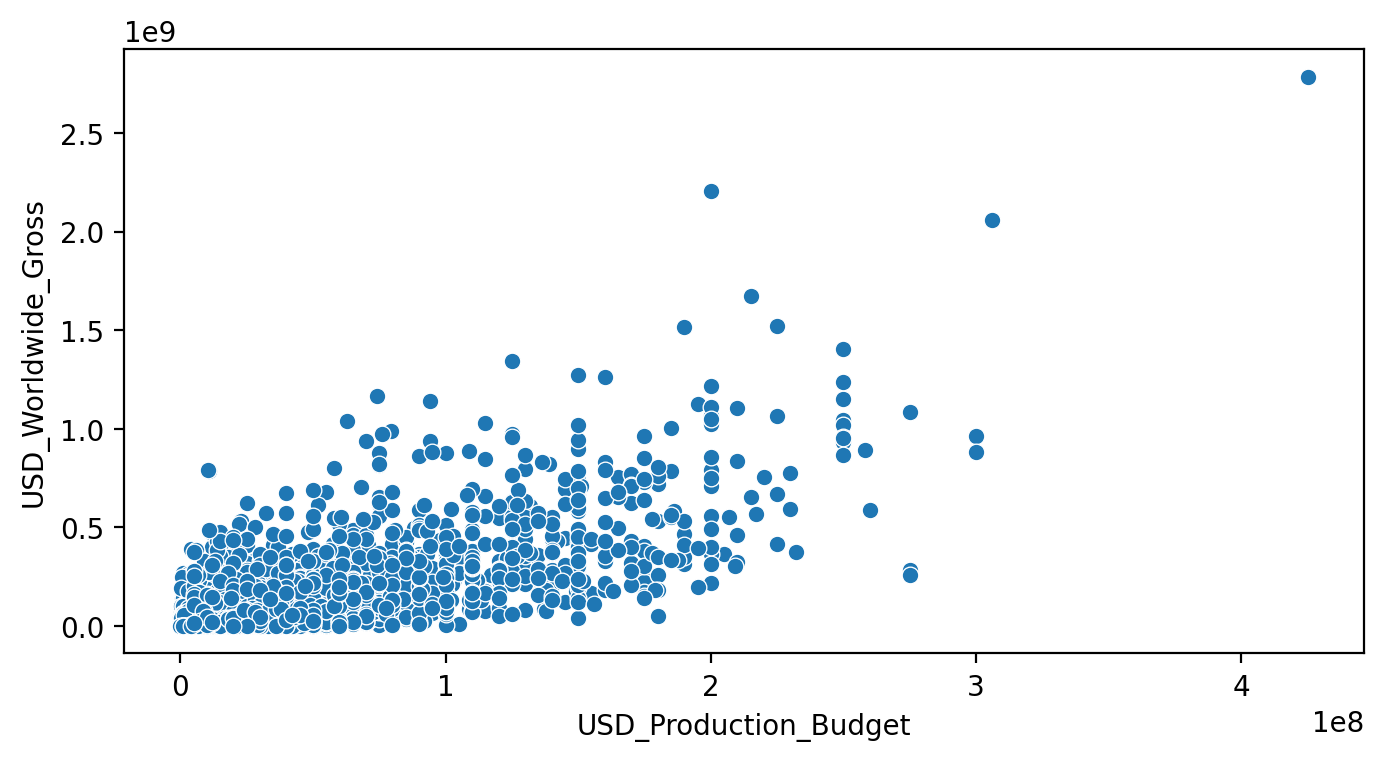

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=clean_data,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

plt.show()

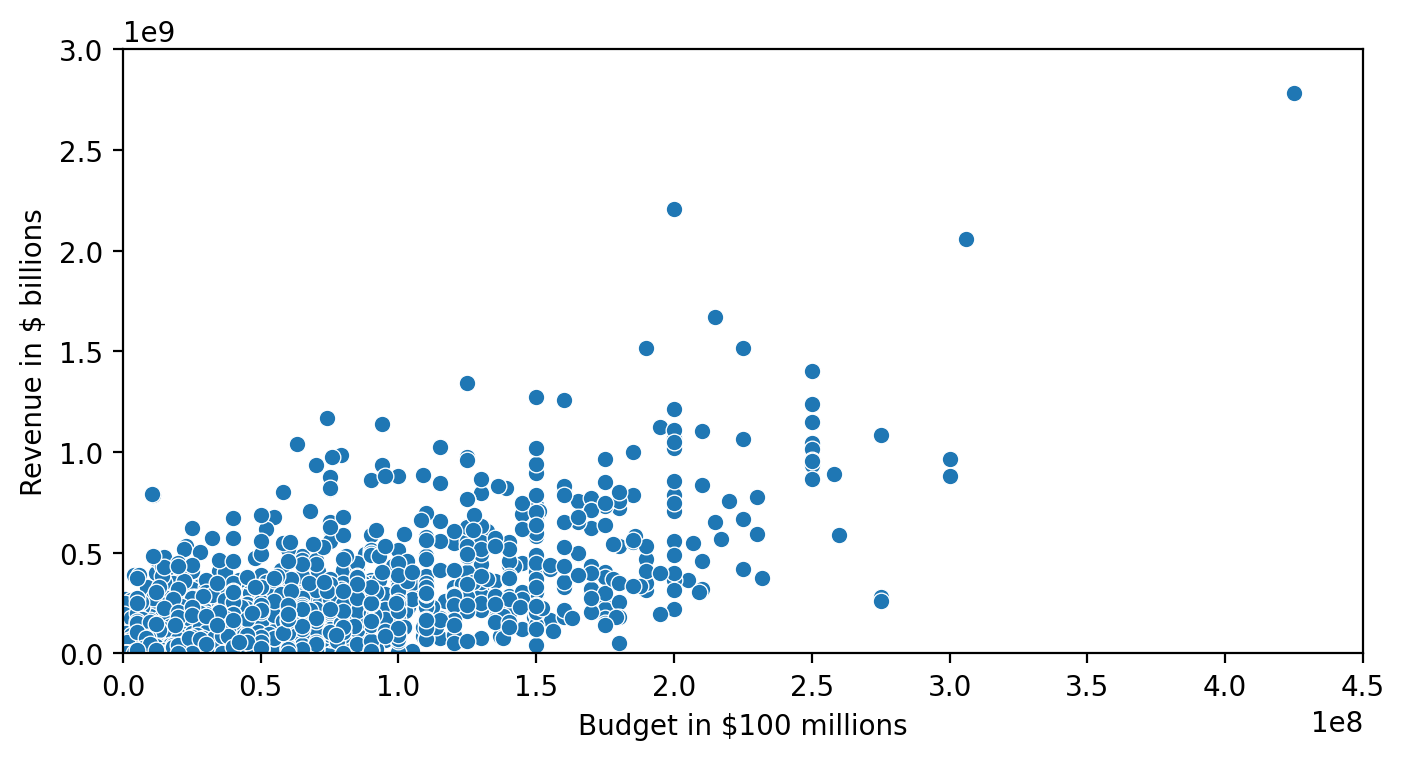

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

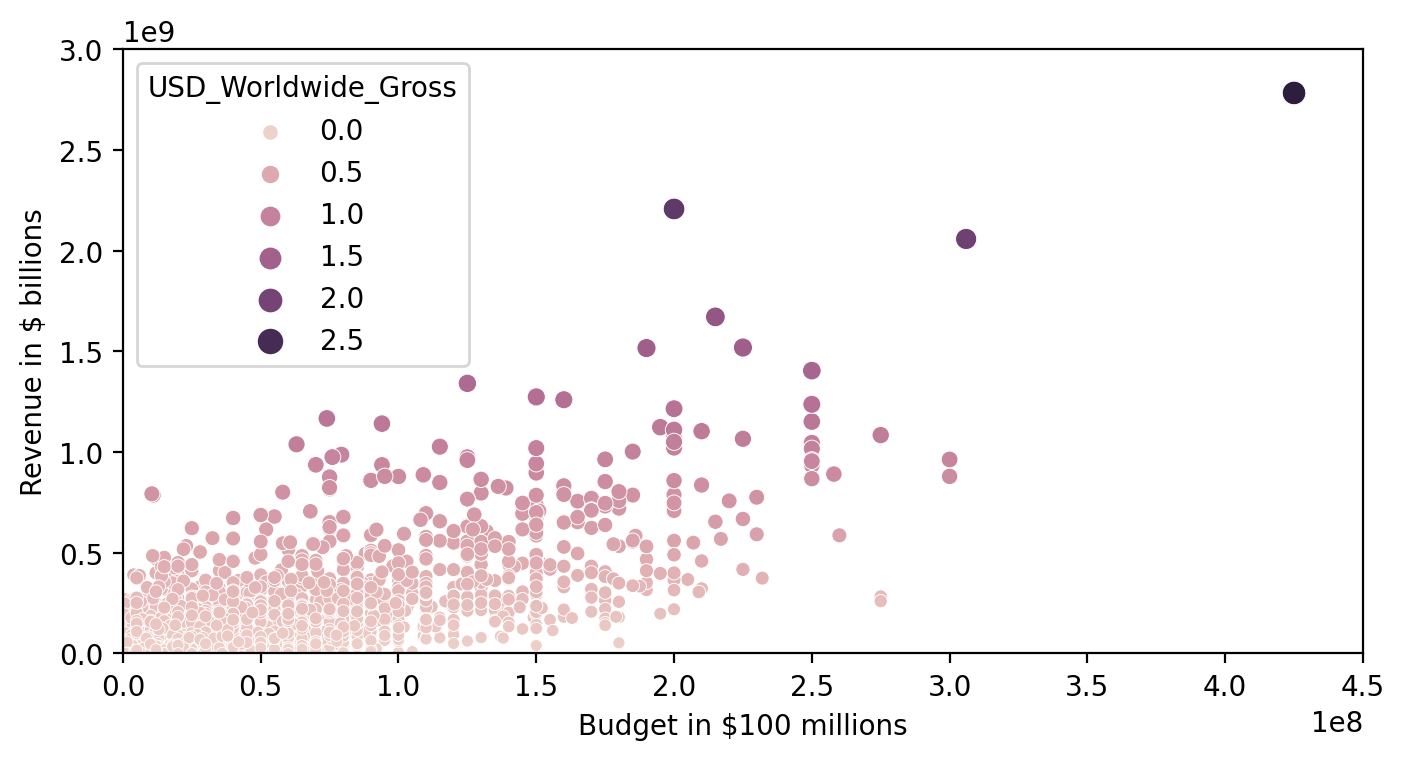

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

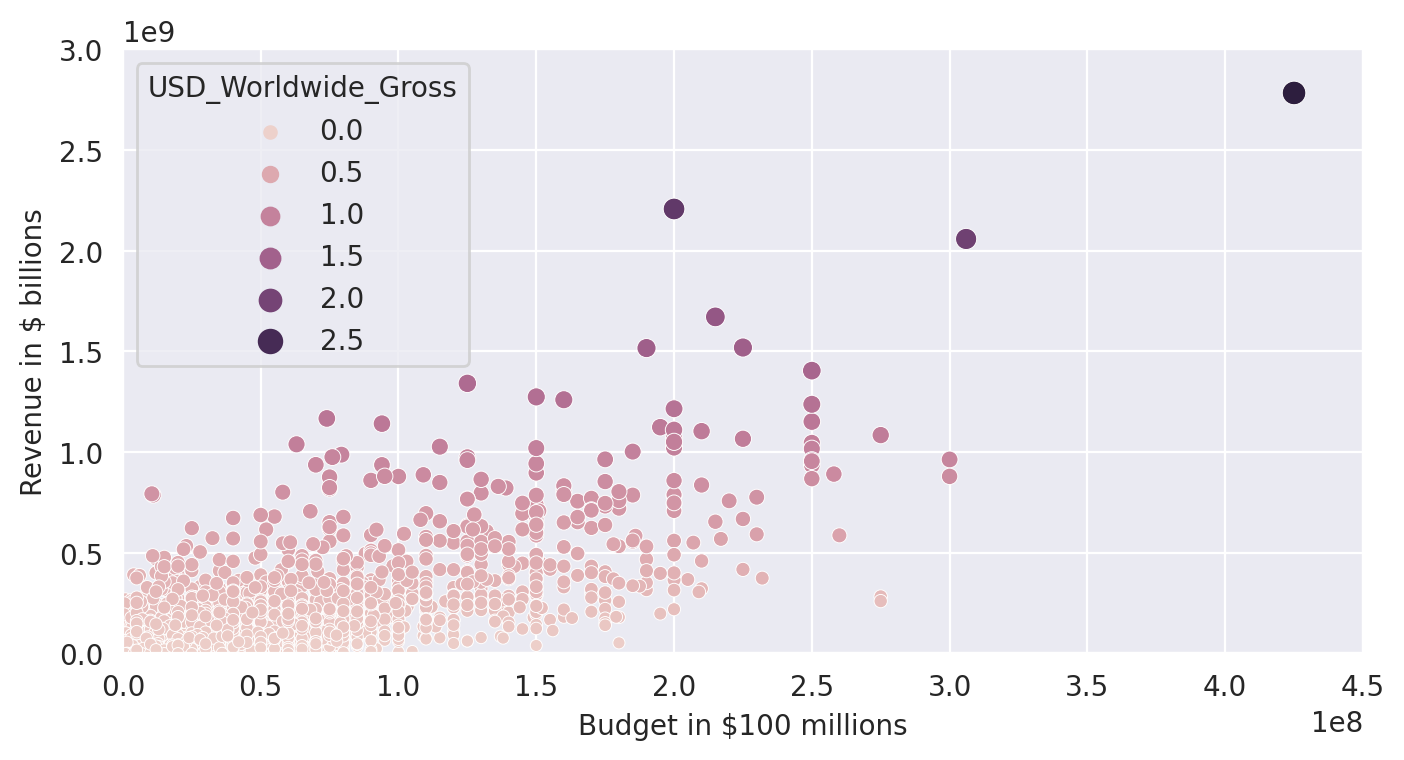

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

from ### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [ ]:
import datetime

years = clean_data['Release_Date'].dt.strftime('%Y')
years

clean_data.insert(loc=2,
          column='Year',
          value=years)

In [ ]:
clean_data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Year                             object
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [ ]:
clean_data.Year = pd.to_numeric(clean_data.Year)
clean_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Rank,Release_Date,Year,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,1915,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,1916,Intolerance,385907,0,0
2,5230,1916-12-24,1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,1925,The Big Parade,245000,22000000,11000000


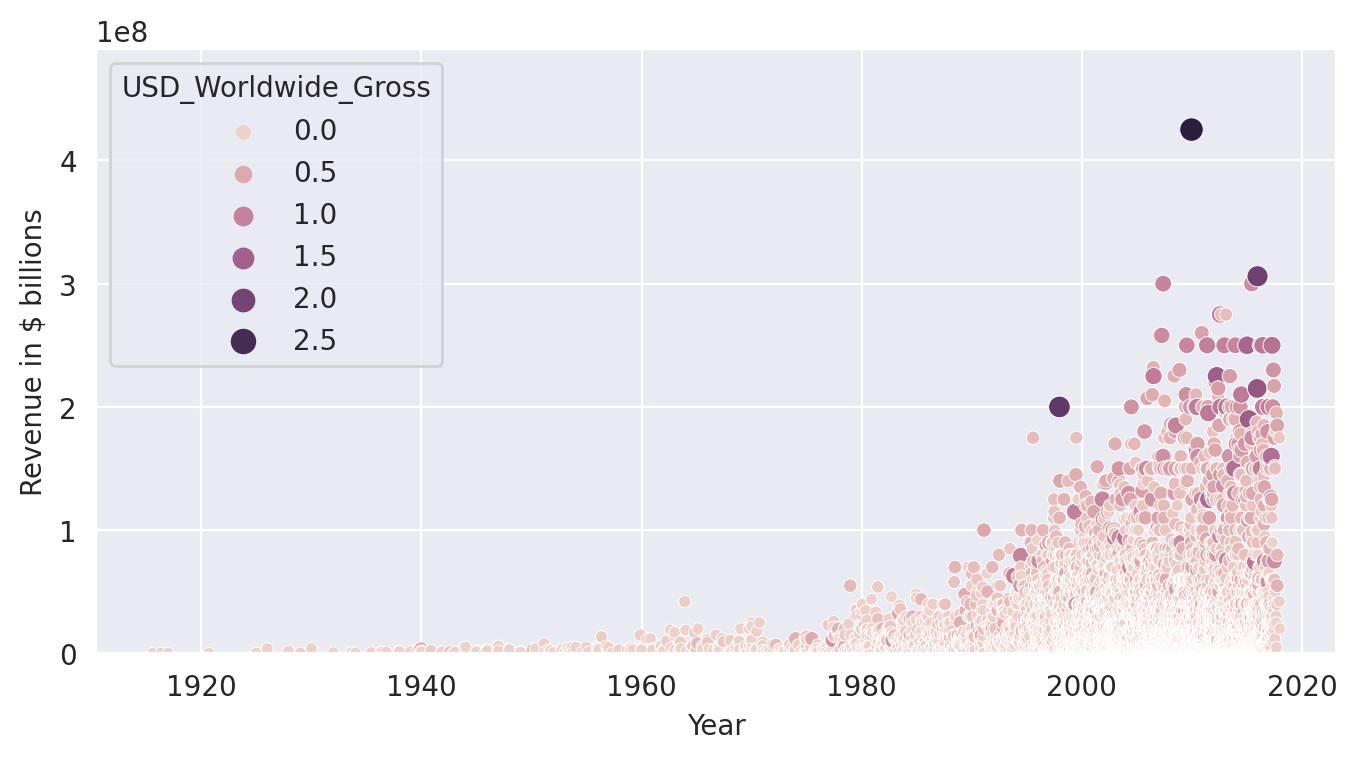

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 490000000),
        ylabel='Revenue in $ billions',
        xlabel='Year')

In [ ]:
decade = (clean_data.Year // 10) * 10
clean_data.insert(loc=3,
          column='Decade',
          value=decade)

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = clean_data.query('Decade < 1970')
new_films = clean_data.query('Decade >= 1970')

In [ ]:
print(old_films.shape)
print(new_films.shape)

(153, 8)
(5230, 8)


In [ ]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Year,Decade,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
109,1253,1963-12-06,1963,1960,Cleopatra,42000000,71000000,57000000
150,2175,1969-12-16,1969,1960,"Hello, Dolly",24000000,33208099,33208099
143,2465,1969-01-01,1969,1960,Sweet Charity,20000000,8000000,8000000
118,2425,1965-02-15,1965,1960,The Greatest Story Ever Told,20000000,15473333,15473333
148,2375,1969-10-15,1969,1960,Paint Your Wagon,20000000,31678778,31678778
...,...,...,...,...,...,...,...,...
147,5228,1969-07-25,1969,1960,The Stewardesses,200000,25000000,13500000
29,5283,1942-11-16,1942,1940,Cat People,134000,8000000,4000000
135,5292,1968-01-10,1968,1960,Night of the Living Dead,114000,30000000,12000000
0,5293,1915-08-02,1915,1910,The Birth of a Nation,110000,11000000,10000000


# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

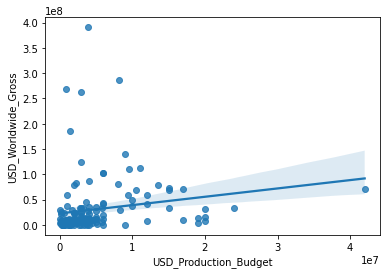

In [ ]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

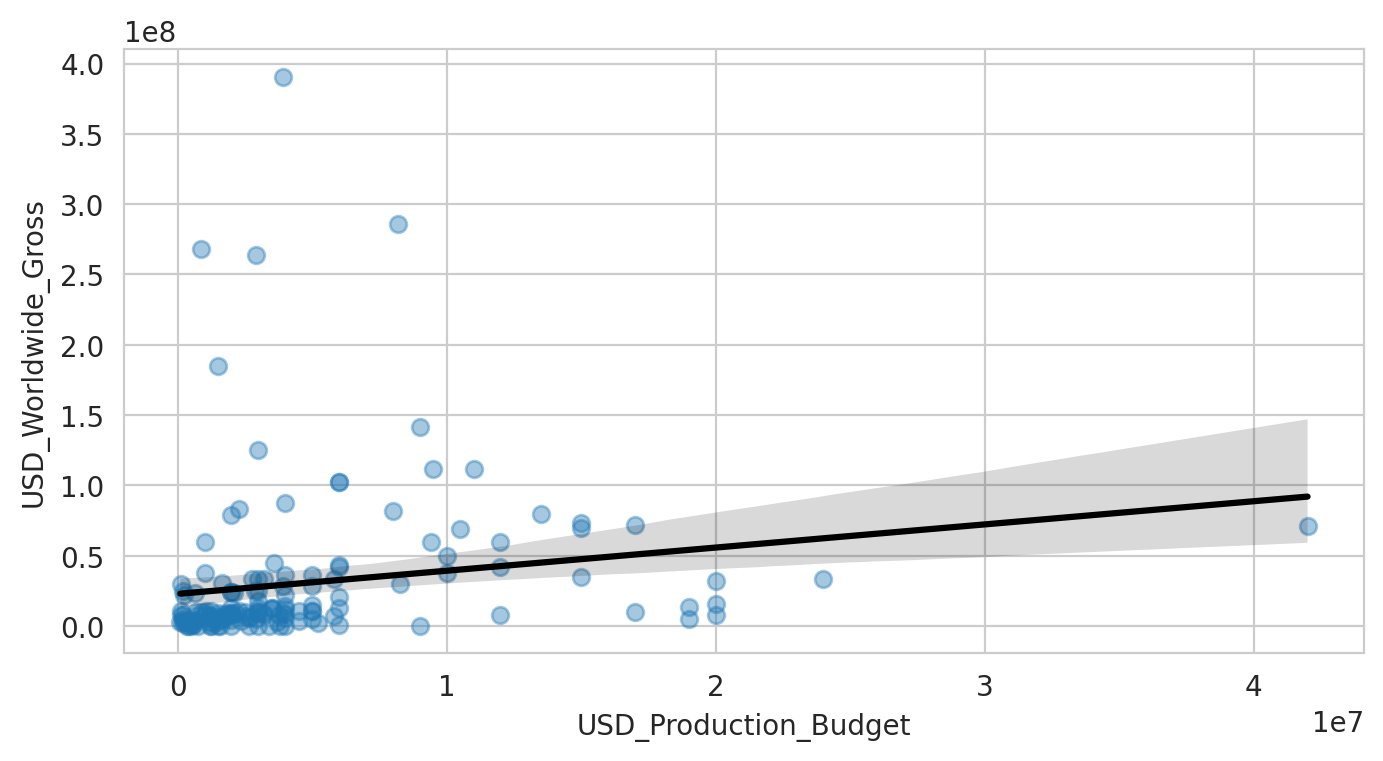

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

<Figure size 1600x800 with 0 Axes>

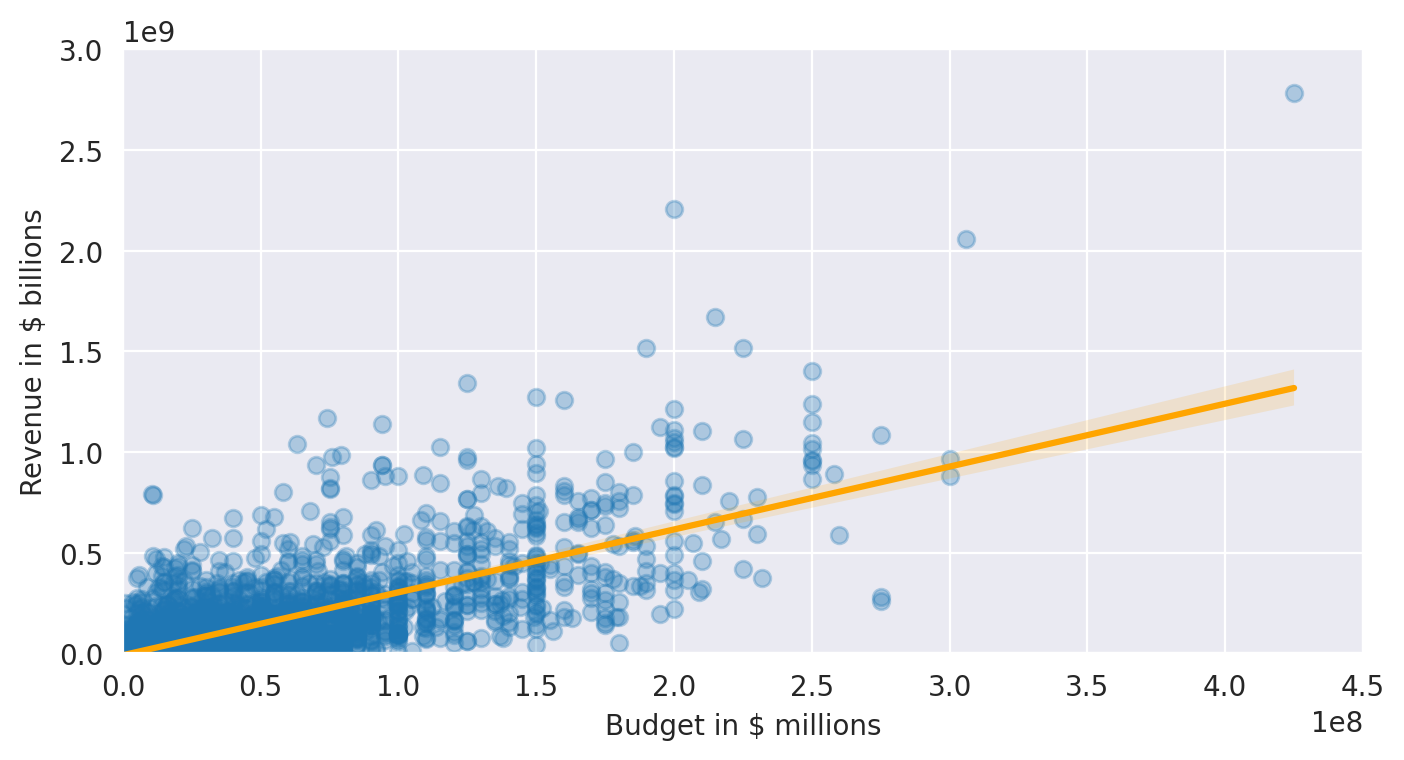

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(8,4), dpi=200)
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': 'orange'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $ millions')
  

plt.show()
 


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [ ]:
regression.fit(X, y)

LinearRegression()

In [ ]:
regression.intercept_

array([-8653311.20858923])

In [ ]:
regression.coef_

array([[3.12262611]])

In [ ]:
regression.score(X,y)

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
o_regression = LinearRegression()

In [ ]:
o_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
o_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

In [ ]:
o_regression.fit(o_X, o_y)

LinearRegression()

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
o_regression.intercept_

array([22821538.63508039])

In [ ]:
o_regression.coef_

array([[1.64771314]])

In [ ]:
o_regression.score(o_X,o_y)

0.02937258620576877

In [ ]:
revenue_estimate = o_regression.intercept_[0] + o_regression.coef_[0,0] * 350000000
revenue_estimate = round(revenue_estimate, -6)

In [ ]:
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
